In [2]:
import sys
sys.path.append("../classes")

In [3]:
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.manifold import TSNE, Isomap, MDS, SpectralEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import numpy as np, pandas as pd
from scipy.cluster import hierarchy
from sklearn.metrics import homogeneity_completeness_v_measure

from geno_classifier import *

from itertools import starmap, product

import GEOparse

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [4]:
results = pickle.load(open('../results/breast_cancer3.results','rb'))
labels = pickle.load(open('../datasets/breast_cancer3_y','rb'))

X_diff, y = preprocess_results(results, labels, True, True, False, False)
X_no_diff, _ = preprocess_results(results, labels, use_diff_score=False, use_pathways=False)

    
    -breast carcinoma

    -breast granular cell tumor

    -breast large cell neuroendocrine carcinoma

    -breast lymphoma

    -breast malignant eccrine spiradenoma

    -breast malignant phyllodes tumor

    -Spacer breast myoepithelial neoplasm

    -Spacer breast sarcoma

    -estrogen-receptor negative breast cancer

    -estrogen-receptor positive breast cancer

    -Spacer female breast cancer

    -Her2-receptor negative breast cancer

    -Her2-receptor positive breast cancer

    -male breast cancer

    -malignant breast melanoma

    -progesterone-receptor negative breast cancer

    -progesterone-receptor positive breast cancer

    -triple-receptor negative breast cancer
    

In [5]:
tsne = TSNE(n_components=2, random_state=42)
diseases_reduced_tsne = tsne.fit_transform(X_diff)

In [6]:
Z = hierarchy.linkage(diseases_reduced_tsne, method='single')

In [7]:
classes = {'unhealthy': 0, 'healthy': 1}
colors = {0 : 'darkmagenta', 1 : 'lightpink'}

labeled_colors = {k:colors[v] for k,v in classes.items()}

In [8]:
labeled_colors

{'healthy': 'lightpink', 'unhealthy': 'darkmagenta'}

In [9]:
def get_color(k, df):
    return labeled_colors[y[k-len(df)]]

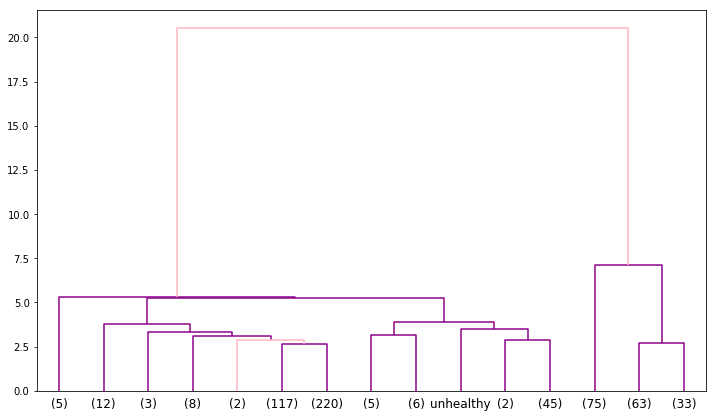

In [13]:
plt.figure(figsize=(12, 7))
dn = hierarchy.dendrogram(Z, p=15, truncate_mode='lastp',
                          labels=y, link_color_func=lambda k: get_color(k, diseases_reduced_tsne))